## <center>Khalifa University</center>
## <center>Computer Science Department
### <center>ENGR 202: Data Science and Artificial Intelligence- Fall 2024
# <center>Lab6: Supervised Machine Learning - MNIST Classification
### Aim: 
    
This lab aims to study the MNIST Classification problem, design, and evaluate the performance of binary and multiclass classifiers.
    
### Objectives:		
    
* Understanding MNIST dataset problem.

* Designing and testing supervised classification Machine learning models. 
    
* Explore the performance of various machine learning models: Binary Classification and Multiclass classification using Decision Tree model.
    
* Performance evaluation using Confusion Matrix
    
* Performance evaluation using cross validation.
  
  
    

#### Risk Assessment: Low


# Introduction:

MNIST stands for Modified National Institute of Standards and Technology database. It is a large database of handwritten digits commonly used for training various image processing systems and classification algorithms. The MNIST database is widely used in the field of machine learning and computer vision as a benchmark dataset for testing and evaluating algorithms, particularly those related to image recognition and classification tasks.

Here are some key points about the MNIST dataset:

Content: MNIST consists of 70,000 grayscale images of handwritten digits (0 through 9), with each image being 28 pixels in height and 28 pixels in width. This results in a total of 784 features (28x28 pixels) for each image.

Purpose: MNIST was originally created for evaluating the performance of machine learning algorithms in recognizing handwritten digits. It serves as a standard benchmark for testing the accuracy and efficiency of classification algorithms, particularly in the context of digit recognition tasks.

Usage: Researchers, educators, and practitioners use the MNIST dataset for a variety of purposes, including algorithm development, model training, and educational demonstrations. It is often used as a starting point for learning machine learning concepts, as it provides a relatively simple yet challenging classification problem.

Availability: The MNIST dataset is freely available and widely used in various machine learning libraries and frameworks, such as scikit-learn, TensorFlow, and PyTorch. It can be easily accessed and downloaded from online repositories or directly from within these libraries.

Overall, the MNIST dataset serves as an essential resource for the machine learning community, offering a standardized dataset for benchmarking and comparing different algorithms and techniques in the field of image classification and pattern recognition.

# MNIST

**Q1.Use `fetch_openml()`  from sklearn dataset to fetch MNIST dataset.**

Note: Fetched data will be in a form of dictionary. 

In [3]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist_data = fetch_openml('mnist_784', version=1, as_frame=False) # Returns a dictionary.

**Q2. Print keys of the dictionary to know more about your dataset**

In [4]:
#print the keys
mnist_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In this lab, you will train a machine learning model to predict numbers contained in MNIST images. The MNIST images is stored in the dictionary under key named "**data**" while contained numbers in the images are stored as text in a key named "**target**". 

**Q3**: Define a variable called **X** to stored all images and another variable called **y** to store the corresponding contained number

In [5]:
X = mnist_data['data']
y = mnist_data['target']

**Q4. Using Python code, answer the following questions.**


* **<span style="color:blue"> How many images do you have in the dataset?</span>**

In [6]:
print(f"Number of images is: {len(X)}")

Number of images is: 70000


* **<span style="color:blue"> How many pixels are there for each image? </span>**


In [7]:
print(f"Number of pixels is: {X[0].shape}")

Number of pixels is: (784,)


You have given a function called `plot_digits()` that takes pixels of a flattened image, as what you are currently have in MNIST, and recover its dimensions, **28x28**, then display the image using `matplotlib`.

**Q5.Use `plot_digits()` to plot the first image in the dataset, which is saved in variable `X`.**

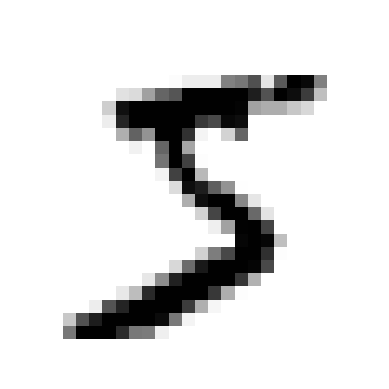

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digits(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,interpolation="nearest")
    plt.axis("off")

# Select first image from the data.
first_image = X[0]
# Call plot_digits() and send the image to display
plot_digits(first_image)

**Q6. Print the corresponding target value, which is stored in `y`?**

In [9]:
y[0]

'5'

Note that the label is a string. We prefer numbers, so let’s cast y to integers:

In [10]:
#since y is originally fetched as a string array (due to its nature as labels), the line y = y.astype(np.uint8) is converting it from a string type to an unsigned 8-bit integer (uint8) type
import numpy as np
y = y.astype(np.uint8)

**Q7.Complete the code below to plot digits of the first 20 images in the MNIST.**  
*Hint. Use a for loop and  plt.subplot(4,5,i + 1) inside it to have all numbers in one figure.*

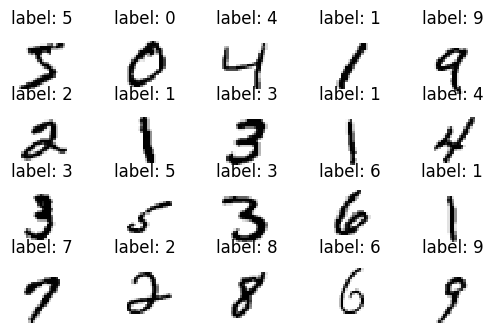

In [11]:
for i in range(20):
    plt.subplot(5,5,i + 1)
    example_images = X[i]
    example_label = y[i]
    plot_digits(example_images)
    plt.title('label: '+ str(example_label))
plt.show()

## Splitting training and testing set

In previous labs, we split the dataset into train and test sets; however, it is best practice to divide the dataset into three splits: training, validation, and test dataset. The training dataset is used to train the model after fine-tuning its parameters. The validation dataset, on the other hand, is used during the fine-tuning process to evaluate the model against overfitting and underfitting. Lastly, the test dataset is used as unseen data that assesses the generalization of the machine learning model.  

Usually, the ratio between the three splits is about 70% for training, 20% for validation, and 10% for testing. 

Follow the steps ordered below to split the data properly.
1. As you did in the previous labs, split the entire dataset into 70% training and 30% testing data.
2. Next, use the same code to split the testing data into 20% validation and 10% testing.
3. Print the size of the training, validation, and testing data and verify the procedures from the output. 

In [12]:
from sklearn.model_selection import train_test_split

# Split the training data into training and testing datasets
X_train, X_test = train_test_split(X, test_size=0.30 , random_state=5,shuffle=True)
# Split the training labels into training and testing datasets
y_train, y_test = train_test_split(y, test_size=0.30, random_state=5,shuffle=True)

# Split the test data into test and validation
X_val, X_test   = train_test_split(X_test, test_size=0.33, random_state=5,shuffle=True)
y_val, y_test   = train_test_split(y_test, test_size=0.33, random_state=5,shuffle=True)

print('train data:', len(X_train), ' validation data:', len(X_val), ' testing data:', len(X_test))

train data: 49000  validation data: 14070  testing data: 6930


## Training a Binary Classifier

In this part, we will simplify the problem and identify whether an image contains the digit "5" or not. This “5-detector” will be an example of a binary classifier capable of distinguishing between just two classes: Either the image contains 5 or not. 

Yet, we will use the training and testing data only, no validation data will be used in this part. 

**Q8.** Create the target vectors  **y_train_5** and **y_test_5** for this classification task to make it true if the y is equal to 5, false otherwise.

In [13]:
# Create target vector for the training dataset
y_train_5 = (y_train == 5)
# Create target vector for the testing dataset
y_test_5 = (y_test == 5)

We will use decision tree regressor model to learn and classify digit contained in images. Scikit-Learn provides a class called  `DecisionTreeClassifier` that can be used to define a decision tree model. 

**Q9: Initialize a DecisionTreeClassifier model and use fit() function to train the model on the training dataset**

In [14]:
from sklearn.tree import DecisionTreeClassifier

DTR_model = DecisionTreeClassifier(random_state=0)
DTR_model.fit(X_train, y_train_5)

DecisionTreeClassifier(random_state=0)

To gain some insight into the model's performance, we will pick three random images and use the trained model to predict whether the digits contained in these images are digit five or not. The `plot_digits` function, from **Q5**, will display the selected images and print the corresponding prediction. 

**Q10. As per the size of the test dataset, choose three random indices (Not consecutive) and display their images alongside the prediction from the model. Make sure at least one of the selected indices contains digit 5. Check the hint below**

The model prediction is : [False]


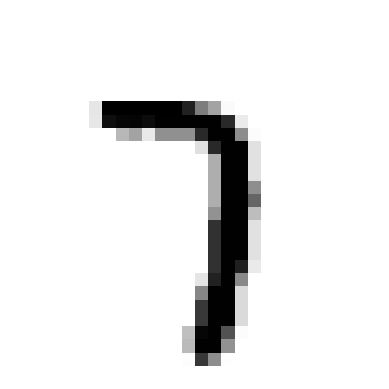

In [15]:
# (Hint) This is one example of picking a random index, say 102, and displaying the corresponding images and predictions. 

image = X_test[102]

model_prediction = DTR_model.predict([image])

print("The model prediction is :", model_prediction) # 0: contained digit is not 5 | 1: contained digit is 5
plot_digits(image) 

# Repeat the code above and try two more different indices in which one of them at least contains digit 5.

The model prediction is : [False]


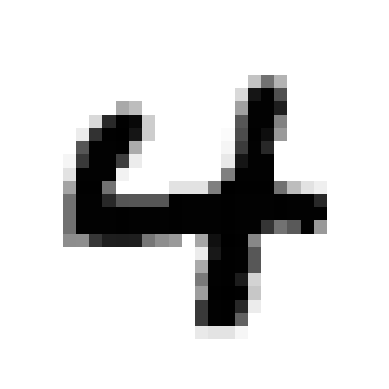

In [16]:
# Second selected index:
img = X_test[200]
model_prediction = DTR_model.predict([img])
print("The model prediction is :", model_prediction) 
plot_digits(img)


The model prediction is : [False]


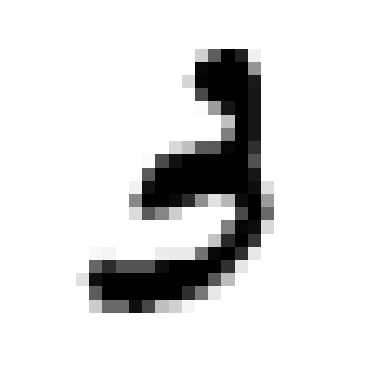

In [17]:
# Third selected index:
img = X_test[300]
model_prediction = DTR_model.predict([img])
print("The model prediction is :", model_prediction)
plot_digits(img)


## Performance Measures

### Measuring Accuracy Using Cross-Validation

Let’s use the k-folds cross-validation cross_val_score() function to evaluate your DecisionTreeClassifier model with k=3.
Remember that K-fold cross-validation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds.

In [18]:
from sklearn.model_selection import cross_val_score

cross_val_score(DTR_model, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96945023, 0.9752648 , 0.96957081])

**Q11. based on the accurcy calculated above answer the follwoing questions? (Write the answer in the same cell)**

* **<span style="color:blue">Is the accurcy good enough? </span>**

`Yes, achieving over 96% accuracy is great comparing it to the baseline of random predictions (50%)`

* **<span style="color:blue">
Assume that you have a classifier that only gives the classification of " not_five" all the time. What the accuracy will be approximately? </span>**

`50%`
* **<span style="color:blue">
We can conclude that accuracy is not a good performance measure in binary classification. Explain? </span>**

`since we only have two labels it isn't the best considering it doesn't account for false positive and true negatives.`

### Confusion Matrix

Since we concluded that accuracy is not always a preferred measure of the classifiers performance. Let's use the Confusion Matrix.

To compute the confusion matrix, you first need to have a set of predictions, so they
can be compared to the actual targets. We can use the `cross_val_predict()` function from sklearn.model_selection. Just like the `cross_val_score()` function, `cross_val_predict()` performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. 

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(DTR_model, X_train, y_train_5, cv=3)

**Q12. Now get the confusion matrix using the confusion_matrix() function. Just pass it the target classes (y_train_5) and the predicted classes (y_train_pred)**

**Hint:** <url>https://www.w3schools.com/python/python_ml_confusion_matrix.asp</url>

In [20]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_train_pred, y_train_5)
c_matrix

array([[43870,   680],
       [  720,  3730]])

**Q13.** Explain what each number in the confusion Matrix represents?

**Q14.** Calculate the precision from the matrix above.

In [23]:
# Pick true positive
tp = c_matrix[1][1]
# Pick false positive
fp = c_matrix[1][0]
# Calculate the precision
precision = tp / (tp + fp)

print('Precision:',precision * 100, '%')

Precision: 83.82022471910112 %


**Q15.** Calculate the recall from the matrix above.

In [44]:
# Pick false negative
fn = c_matrix[0][0]
# Calculate recall
recall = tp / (tp + fn)

print('Recall:', recall * 100, '%')

Recall: 7.836134453781512 %


**Q16** Why the recall is too low comparing to the precision?

# Part 2: Multiclass Classification

Whereas binary classifiers distinguish between two classes, multiclass classifiers can distinguish between more than two classes. Many AI models solve the multiclass classification problem using either one-versus-all or one-versus-one methods. 
Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task when using DecisionTreeClassifier, and it automatically runs One versus All (OvA). It runs ten binary classifiers at the back and gets their decision scores. Then, the prediction will be the class with the highest score.

**Q17. Re-train the Classifier using the X_train and the y_trian target instead of the binary target y_train_5**

In [27]:
# Hint: Use the same model "DTR_model" variable to complete this part
DTR_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

**Q18.Test your model to predict any of the indices you selected in Q10.**

The model prediction is : [9]


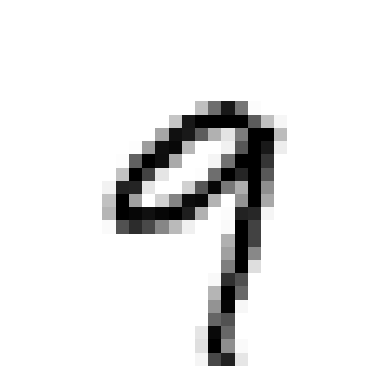

In [28]:
img = X_test[0]
pred = DTR_model.predict([img])
print("The model prediction is :", pred)
plot_digits(img)


**Warning**: the following two cells may take close to 30 minutes to run, or more depending on your hardware.

**Q19.Evaluate the performance by computing the cross validation 3 folds?**

In [30]:
cv = cross_val_score(DTR_model, X_train, y_train, cv=3, scoring="accuracy")
cv

array([0.85233256, 0.85746648, 0.85177249])

**Q20. Comment on the accuracy?**

**Q21. If this is a real project, what can you do to improve the performance of the Model?**

## Error Analysis

**Q22. Compute and print the confusion matrix?**

In [31]:
# Compute the cross validation 
y_train_pred = cross_val_predict(DTR_model, X_train, y_train, cv=3)
# Obtain the confusion matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4413,    9,   57,   53,   26,   83,   69,   21,   56,   25],
       [   3, 5237,   41,   42,   31,   37,   18,   30,   47,   22],
       [  65,   78, 4042,  151,   67,   71,   96,  103,  151,   74],
       [  34,   61,  145, 4053,   52,  266,   38,   76,  186,  105],
       [  34,   28,   56,   58, 4128,   50,   77,   79,   98,  235],
       [  79,   51,   43,  236,   69, 3527,  119,   34,  143,  109],
       [  76,   29,   85,   33,   83,  110, 4263,   12,   91,   26],
       [  20,   51,  109,   87,   67,   26,    6, 4488,   54,  159],
       [  63,   81,  183,  196,  117,  137,   92,   61, 3721,  152],
       [  30,   26,   37,   99,  245,  115,   34,  158,  124, 3967]])

**Q23. What are the big numbers in the diagonal represent?**

That’s a lot of numbers. It’s often more convenient to look at an image representation of the confusion matrix. Use Matplotlib’s matshow() function to draw the confusion matrix.

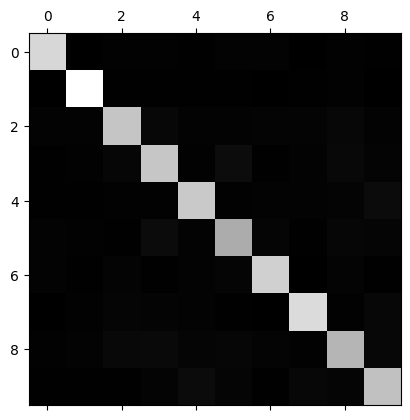

In [32]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Number of correct predictions is clearly light in the diagonal. But number of error cases is represented in grey shades. The colored matrix doesn't tell enough now because number of each class images are not the same. We need to do normalization for better comparison. The code below will divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error rates instead of absolute number of errors (which would make abundant classes look unfairly bad). Then the matrix is plotted again after filling the diagonal with zeros to hide it from our errors study.

In [33]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

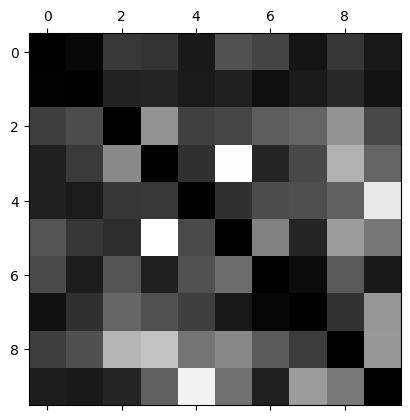

In [34]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

**Q24. What is the highest miss prediction classes (Class A with Class B)?**

**Q25. Class 5 is highly confused with which classes?**

**Q26. Is the confusion matrix symmetric? Give example from the matrix to explain your answer**

**Q27. Display four cases where 3 is detected as 3**

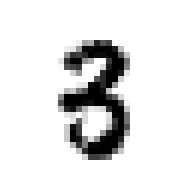

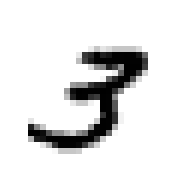

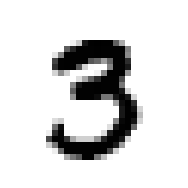

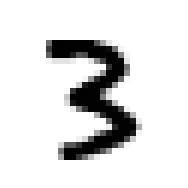

In [37]:
# Code below is to be removed from the students manual
cl_a, cl_b = 3, 5

# Select four cases where 3 is detected as 3
detected_3 = X_train[(y_train == cl_a) & (y_train_pred == cl_a)][:4]


# Use for loop to display each case (Image) using the 'plot_digits()` function.
for i in range(4):
    plt.subplot(2,2,i + 1)
    # Call plot_digits() and pass the image
    plot_digits(detected_3[i])


    
    plt.show()

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [False, False, False, False, False,  True, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False, False,  True,
        False],
       [False, False, False, False, False, False, False, False, False,
         True]])

**Q28. Display four cases where 3 is detected as 5**

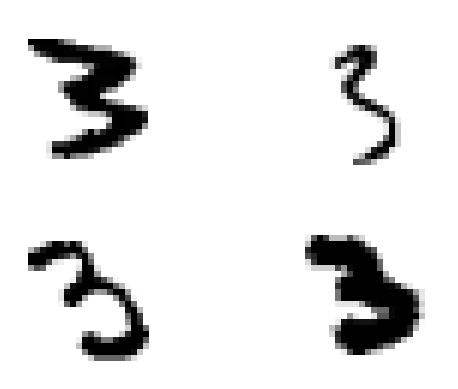

In [38]:
# Select four cases where 3 is detected as 5
detected_5 = X_train[(y_train == cl_a) & (y_train_pred == cl_b)][:4]

# Use for loop to display each case (Image) using the 'plot_digits()` function.
for i in range(4):
    #plt.figure(figsize=(1,1))
    plt.subplot(2,2,i + 1)
    # Call plot_digits() and pass the image
    plot_digits(detected_5[i])

plt.show()

#### 4.2 Maximum Leaf Nodes Selection

The decision tree is formed of several leaf nodes. So far, you have created a decision tree regressor model but have not assigned the maximum number of leaf nodes allowed in the tree. Hence, the decision tree model you have created above has no limit of leaf nodes!

In fact, limiting the number of leaf nodes in the decision tree can enhance your model's performance; however, you do not know exactly what the proper number of leaf nodes is to achieve the highest possible performance. In this section, you will try a different number of leaf nodes (Fine-tuning) and select the best value that makes your model genaralize.  

**Q29: Initialize a list of all possible number of leaf nodes that you want to test. In this case, you may use the following values:** `[5, 50, 500, 1000, 2000, 3000, 4000, 5000]`  

In [39]:
# Different number of leaf nodes for testing
leaf_nodes = [5, 50, 500, 1000, 2000, 3000, 4000, 5000]

Yet, you will only work on the **training and validation dataset** as you experiment with various leaf node values. Eventually, you will select the value with the highest performance. Later, you can test your selection using the test dataset.

You are going to follow these steps to make your final decision about the best maximum number of leaf nodes:
For each leaf node value you have in the `leaf_nodes` list:
1. Initialize a decision tree model with that maximum number of leaf nodes.
2. Train the model using the training dataset.
3. After training, use the model to predict the contained digits of the training dataset.
4. Use the model to predict the contained digits of the validation dataset.
5. Compute the classification accuracy between the prediction of the training dataset and the actual digits.
6. Compute the classification accuracy between the prediction of the validation dataset and the actual digits.
7. Save the computed accuracy of the training dataset in a list called `train_acc_list` and the validation dataset accuracy in a list called `val_acc_list`.
8. Repeat step one with the next number of leaf nodes in the `leaf_nodes` list.


**Step 0: Initialize two lists to hold the training and validation accuracy with the following names: `train_acc_list`, `val_acc_list`.**

In [40]:
# Initialize lists to collect mean absolute error for each leaf node selection
train_acc_list = []
val_acc_list = []


**Q30: Complete the following code to achieve steps mentioned earlier.**

In [41]:
from sklearn.metrics import accuracy_score

# Iterate over each leaf node case.
for max_leaf_nodes in leaf_nodes:
    # Initialize a Decision tree regressor with the selected leaf nodes
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    
    # train the model on the train dataset
    model.fit(X_train, y_train)
    
    
    # Obtain prediction for train dataset
    predictions_train = model.predict(X_train)
    # Obtain prediction for validation dataset
    predictions_val = model.predict(X_val)
    
    # Compute the accuracy for training dataset
    acc_train = accuracy_score(y_train, predictions_train)
    
    # Compute the accuracy for validation dataset
    acc_val = accuracy_score(y_val, predictions_val)
    
    # Add the computed train accuracy to the train_acc_list
    train_acc_list.append(acc_train)
    

    # Add the computed validation accuracy to the val_acc_list
    val_acc_list.append(acc_val)
    
    
    print("Max leaf nodes: %d  \t MAE for training data:  %f  \t\t MAE for validation data:  %f" %(max_leaf_nodes, acc_train, acc_val))

Max leaf nodes: 5  	 MAE for training data:  0.391633  		 MAE for validation data:  0.389908
Max leaf nodes: 50  	 MAE for training data:  0.720286  		 MAE for validation data:  0.719119
Max leaf nodes: 500  	 MAE for training data:  0.900878  		 MAE for validation data:  0.860981
Max leaf nodes: 1000  	 MAE for training data:  0.940878  		 MAE for validation data:  0.877896
Max leaf nodes: 2000  	 MAE for training data:  0.973469  		 MAE for validation data:  0.874485
Max leaf nodes: 3000  	 MAE for training data:  0.995000  		 MAE for validation data:  0.873987
Max leaf nodes: 4000  	 MAE for training data:  1.000000  		 MAE for validation data:  0.870149
Max leaf nodes: 5000  	 MAE for training data:  1.000000  		 MAE for validation data:  0.870149


Although you might have some insightes from the print above, but it still clear which option achieves the best performance. Hence, you will visualize the distribution of the training and valudation accuracy at each option to determine the best value for the leaf nodes.

**Q31: Complete the missing parts of the code below to do the visualization successfully.**

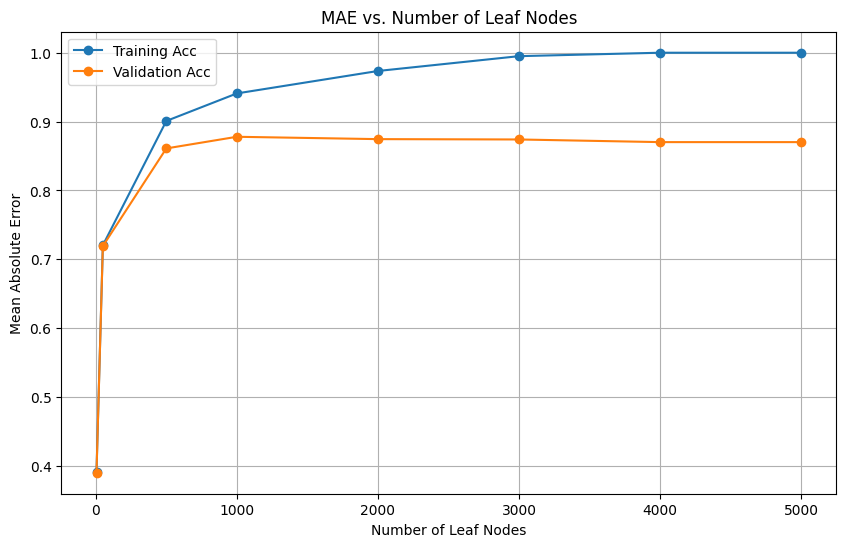

In [42]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(leaf_nodes, train_acc_list, label='Training Acc', marker='o')
plt.plot(leaf_nodes, val_acc_list, label='Validation Acc', marker='o')
plt.xlabel('Number of Leaf Nodes')
plt.ylabel('Mean Absolute Error')
plt.title('MAE vs. Number of Leaf Nodes')
plt.legend()
plt.grid(True)
plt.show()

**Q32: What is the best value for the leaf node?**

Now, do the following steps to test your selection:
1. Create a decision tree model with the best leaf nodes.
2. Train it on the training dataset.
3. Use `predict` function to predict the contained digit in the **testing** dataset images.
4. Compute the accuracy between the predicted and the actual digit of the testing dataset.
5. print the accuracy

In [43]:
#Train the model
model = DecisionTreeClassifier(max_leaf_nodes=1000, random_state=0)
model.fit(X_train, y_train)

# Test the model on the test dataset
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('Accuracy:', acc)





Accuracy: 0.8718614718614719


**Q33: Based on the error you obtained from the decision model with the selected leaf nodes and the one you had before in Q19, which one has better performance on the test dataset?**